In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import torch
from torch import nn
from torch.optim import RMSprop,SGD
torch.manual_seed(0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/drive/My Drive/econ/arima_ann/data/inrvsusd_1957-2019.csv')  # 63 years   ,index_col=0
data

print(data)
type(data['year'][0])
for i in range(len(data['year'])):
  data['year'][i] = str(data['year'][i]-1)+'-'+str(data['year'][i])
print(data)
data=data.set_index('year')
print(data)

    year  inrperusd
0   1957   4.791667
1   1958   4.764833
2   1959   4.765833
3   1960   4.761900
4   1961   4.761900
..   ...        ...
58  2015  64.151950
59  2016  67.195310
60  2017  65.121570
61  2018  68.389470
62  2019  70.420340

[63 rows x 2 columns]
         year  inrperusd
0   1956-1957   4.791667
1   1957-1958   4.764833
2   1958-1959   4.765833
3   1959-1960   4.761900
4   1960-1961   4.761900
..        ...        ...
58  2014-2015  64.151950
59  2015-2016  67.195310
60  2016-2017  65.121570
61  2017-2018  68.389470
62  2018-2019  70.420340

[63 rows x 2 columns]
           inrperusd
year                
1956-1957   4.791667
1957-1958   4.764833
1958-1959   4.765833
1959-1960   4.761900
1960-1961   4.761900
...              ...
2014-2015  64.151950
2015-2016  67.195310
2016-2017  65.121570
2017-2018  68.389470
2018-2019  70.420340

[63 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data['year'][44]

'2000-1'

####Visualize

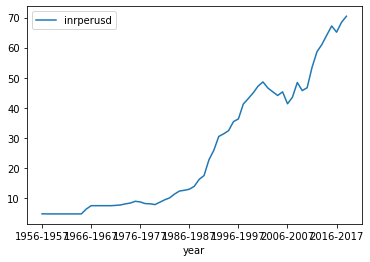

In [3]:
data.plot()
# Remember, if there's trend  it is non-stationary.

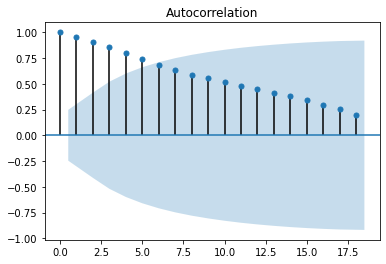

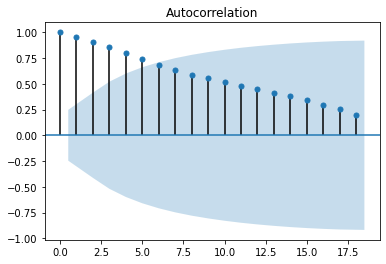

In [4]:
plot_acf(data['inrperusd'])
# Interpreting this: X-axis denotes lag of time(towards right) . when x=0, there;s no lag, So the correlation between x and x is 1. Now with lag=1, x1 = shift ervy value in x by 1. and now plot auto correlation b/w these.
# So in lag=1, you correlate x[0] with x[1] and in lag=5 corealte x[0] with x[5]  and so on. So if the auto corelation is high which means that there;s some correkation between x[0] and x[5] and so on..
# Naturally, it is expexted that with time , the correlation decreases. 
# So it proves that the data is not stationary. And in a stationary data, the auto correlation drops suddenly.

####So making it stationary

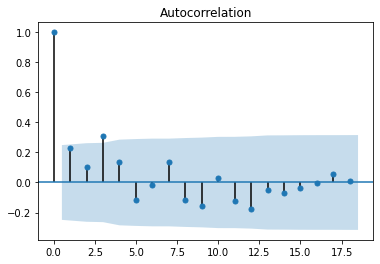

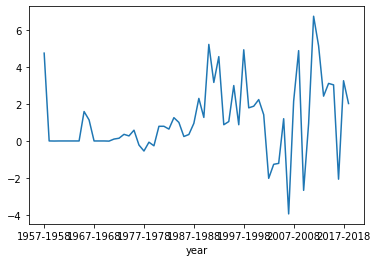

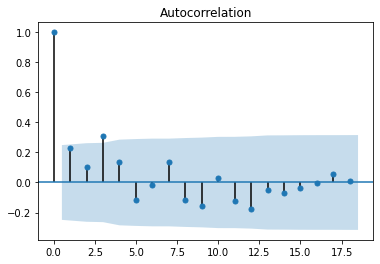

In [5]:
inrperusd_diff1 = data['inrperusd'][1:].diff(periods=1).fillna(data['inrperusd'])    # can remove fillna by [1:] in inrperusd_diff
inrperusd_diff1.plot()
plot_acf(inrperusd_diff1)
# Integrated of order-1(d=1)
# Ok, after the first differencing, it becomes fairly stationary(except or the 2 peaks at beginning and end) . Mean,var laso seems statinary 

####DataSplit

In [6]:
#according to paper #And you can change the data value of last in test to 3075 as it is in the paper
train = data['inrperusd'][:53] #53
test = data['inrperusd'][53:] #10
# print(train.tail())
print(test.tail())
print(len(test))
# Ok, you do differencing just to find d , and your train and test stll contain the calues of main data only

year
2014-2015    64.15195
2015-2016    67.19531
2016-2017    65.12157
2017-2018    68.38947
2018-2019    70.42034
Name: inrperusd, dtype: float64
10


###ARIMA

####Modelling

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


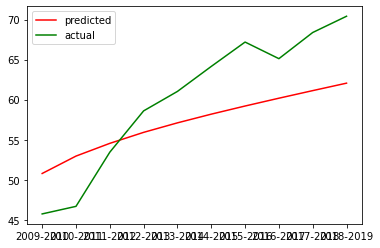

198.81666583593363


In [7]:
arima_model = ARIMA(train,order=(2,1,0))    #according to paper !
#order : pass in parameters, (p,d,q) where d is the order of differencing you have done, p is the number of past periods you consider for the auto-regressive model(AR), q is the number of past periods you consider for the moving-average model(MA).
# 
fitted_model = arima_model.fit(disp=0)
predict = fitted_model.forecast(steps=10) #steps=how many next values you want to predict 
# predict = fitted_model.predict(start=54,end=64)
plt.plot(predict[0],color='red',label='predicted')    #predict[0] contains the predictions
plt.plot(test,color='green',label='actual')
plt.legend(loc='upper left')
plt.show()
predictions=predict[0]  
predictions
print(fitted_model.aic)
#  can use print(fitted_model.summary())
# With forecast() : Prediction is done in the levels of the original endogenous variable. If you would like prediction of differences in levels use predict
# https://i.stack.imgur.com/LKuBM.png also shows that there's differnce b/w predict and forecast()
# fitted_model.params

In [8]:
print(predictions,test)

[50.77674961 52.95015261 54.54098011 55.91458821 57.10205594 58.18830309
 59.20544887 60.18076424 61.12913973 62.06071765] year
2009-2010    45.72581
2010-2011    46.67047
2011-2012    53.43723
2012-2013    58.59785
2013-2014    61.02951
2014-2015    64.15195
2015-2016    67.19531
2016-2017    65.12157
2017-2018    68.38947
2018-2019    70.42034
Name: inrperusd, dtype: float64


Finally

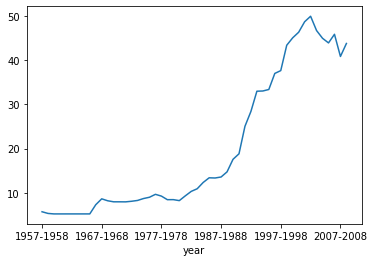

In [9]:
# assert(all(fitted_model.predict(dynamic=False))==all(fitted_model.fittedvalues))    #tHEY BOTH ARE SAME 
# fitted_model.plot_predict(dynamic=False)
# plt.show()
fitted_model.predict(dynamic=False,typ='levels').plot()

* Compared these predicted values to the values given in the paper:There's just a little diference in each element(may be bcoz python!=sas) and fine overall

####Evaluation of the Model

In [10]:
def mape(true,pred):
  sum = 0
  assert(len(true)==len(pred))
  for i in range(len(true)):
    val=abs(true[i]-pred[i])
    val = val/true[i]
    sum+=val
  return (sum/len(true))*100
# / for float division and // for integer diision in python

In [11]:
mse  = mean_squared_error(test,predictions)
mapee =  mape(test,predictions)
print(mse)
print(mapee)
# assert(mean_squared_error(test,predictions)==mean_squared_error(predictions,test)) # they are same

33.51996665044878
8.884233563872817


* FOR ARIMA
* According to paper mse  = 11686.41 and according to our results = 11676.880204108427
* According to paper, mape = 3.18 and according to our results = 3.1761937

####Find the best parameters

In [ ]:
import warnings
import sys
warnings.filterwarnings('ignore')
import itertools
p=d=q = range(0,21) # 0...5 for each
pdq = list(itertools.product(p,d,q))  # 125 cominations for 5
type(pdq[0])# is a tuple

best_aic = sys.maxsize  #Its like cpp's INT_MAX
best_params = (0,0,0)
for params in pdq:
  try:    #bcoz all cobinations of p,d,q are not valid. (You cant certainly go beyond a certain range)
    arima_model = ARIMA(train,order=params)
    fitted_model = arima_model.fit()
    if(fitted_model.aic<best_aic):
      best_aic = fitted_model.aic
      best_params = params
      print(best_params,best_aic)
  except Exception as e:
    pass
  
print(best_params,best_aic)

* As per paper, they took (2,1,0) which has aic of 641.652418086394 here 
* But the best fitted model is (2,2,1) with aic of 636.8454725751974 and there are 3-4 params which has better aic than (2,1,0)

* The AIC will take each model and rank them from best to worst. The “best” model will be the one that neither under-fits nor over-fits.
* AIC = -2(log-likelihood) + 2K
    *  K is the number of model parameters (the number of variables in the model plus the intercept).
    *  Log-likelihood is a measure of model fit. The higher the number, the better the fit. This is usually obtained from statistical output.

###Get Residuals

In [12]:
import itertools
import warnings
import numpy as np
warnings.filterwarnings('ignore')
arima_model = ARIMA(train,order=(2,1,0))    #according to paper !

fitted_model = arima_model.fit(disp=0)

fittedvalues = fitted_model.predict(dynamic=False,typ='levels')

actualvalues = train

residuals = (actualvalues - fittedvalues)[1:]    #1st ones is Nan

residualsdata =[ [[0 for i in range(5)],[0]] for k in range(len(residuals)-5)]

for i in range(5,len(residuals)): #len(residuals)
  residualsdata[i-5] = [[residuals[k] for k in range(i-5,i)],[residuals[i]]]
residualsdata = np.array(residualsdata)

for i in range(len(residualsdata)):
  residualsdata[i][0] = np.array(residualsdata[i][0])
  residualsdata[i][1] = np.array(residualsdata[i][1])

print(residualsdata[-1])
print(residuals[-6:])
print(residualsdata.shape)

[array([-1.39079129, -0.8572262 ,  1.39393518, -4.51529703,  2.66192117])
 array([4.62267593])]
year
2003-2004   -1.390791
2004-2005   -0.857226
2005-2006    1.393935
2006-2007   -4.515297
2007-2008    2.661921
2008-2009    4.622676
dtype: float64
(47, 2)


####Modelling ANN/WNN

In [13]:



# define wavelet activation . As you are using pytorch funcs, no need of defining backward function (bcoz they have autograd wit them) and it dont have any learnable params also
def wavelet(x):
  return torch.mul(torch.exp( -1* torch.square(x)), torch.cos(5*x))

class ANN(nn.Module):
  def __init__(self,iswnn):
    super(ANN,self).__init__()
    self.layer1numnodes = 5
    self.layer2numnodes = 3
    self.fc1 = nn.Linear(self.layer1numnodes,self.layer2numnodes,bias=True) #is this ok with arch as in paper !? or did he meant 5,3 & 3,3 & 3,1 ?
    self.fc2 = nn.Linear(self.layer2numnodes,1,bias=True)
    # self.dup = nn.Linear(self.layer2numnodes,self.layer2numnodes,bias=True)   #WHEN you want to try (5,3,3,1)
    self.activation = nn.Sigmoid()
  def forward(self,x):
    x = self.fc1(x)
    # x = self.dup(x)
    if(iswnn):
      x  = wavelet(x)
    else:
      x = self.activation(x)    #according to paper, activation is in hidden layer, not the last layer(ofcourse putting in last layer makes it tough to get a numebrocal value>1)
    x = self.fc2(x)
    
    return x
def trainModel(resids,num_iters,learning_rate,momentum,iswnn):
  model = ANN(iswnn)
  model = model.double()
  model.train()

  loss_func = nn.MSELoss()#loss fucntion 
  opt = RMSprop(model.parameters(),lr=learning_rate,momentum=momentum)#optimizer
  for i in range(num_iters):
    iterloss=0
    for x,y in resids:
      # print(x,y)
      x = torch.from_numpy(x).double()
      y = torch.from_numpy(y)
      ypred =  model(x).reshape(shape=(1,1))
      loss = loss_func(ypred[0],y[0])
      iterloss += loss.data
      loss.backward()
      opt.step()
      opt.zero_grad()
    print("Epoch {}/{} \n Training: loss: {} ".format(i+1,num_iters,iterloss))
  
  return model  #trained model is returned for evaluation later 

#####Training the model

In [21]:
iswnn = False#True  #False

# constants as per paper

learning_rate = 0.04
momentum = 0.02
num_iters = 1500
model = trainModel(residualsdata,num_iters,learning_rate,momentum,iswnn)

Epoch 1/1500 
 Training: loss: 129.74875211765075 
Epoch 2/1500 
 Training: loss: 122.89196265923658 
Epoch 3/1500 
 Training: loss: 119.12585111698483 
Epoch 4/1500 
 Training: loss: 116.82249620617526 
Epoch 5/1500 
 Training: loss: 115.42545292647527 
Epoch 6/1500 
 Training: loss: 114.51493634338341 
Epoch 7/1500 
 Training: loss: 112.87303901460952 
Epoch 8/1500 
 Training: loss: 108.2741402510918 
Epoch 9/1500 
 Training: loss: 102.85123845409527 
Epoch 10/1500 
 Training: loss: 97.67860320251575 
Epoch 11/1500 
 Training: loss: 92.9680523091484 
Epoch 12/1500 
 Training: loss: 89.09406829854106 
Epoch 13/1500 
 Training: loss: 85.64289339274693 
Epoch 14/1500 
 Training: loss: 82.5475651944812 
Epoch 15/1500 
 Training: loss: 79.69788871319167 
Epoch 16/1500 
 Training: loss: 77.10949514344468 
Epoch 17/1500 
 Training: loss: 74.85075227683062 
Epoch 18/1500 
 Training: loss: 72.90700400668362 
Epoch 19/1500 
 Training: loss: 71.18694424378832 
Epoch 20/1500 
 Training: loss: 69

####Arima+Ann/WNN Validation

50.53129431456353
51.28909494089915
57.22788501125011
55.10616237512458
56.85660064098157
57.94309503398209
62.3426232816378
63.43401876888582
59.468082047268474
60.445654598553205


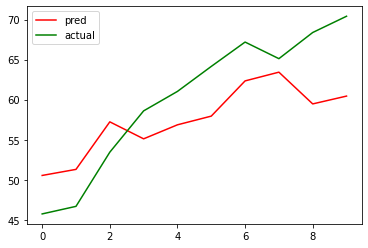

In [22]:
#1. Get residua;s for test data
#2. Append lasy 5 residuals of train data to the above residuals
#3. Convert them into desired format
#4. uSing these predict from ANN
#5. Add the predicted residuals to linear part and evaluate the model

#1
# test = data['inrperusd'][54:-4]
train = data['inrperusd'][:53] #53
test = data['inrperusd'][53:] #10
# print(test[0])

arima_model = ARIMA(train,order=(2,1,0))
fitted_model = arima_model.fit(disp=0)
predict = fitted_model.forecast(steps=10)[0]

valresiduals = list(test - predict)

#2 
lasttrainresiduals = list(residuals[-5:])
lasttrainresiduals.extend(valresiduals)   #append appends the entore array and extend just adds the values

testandlasttrainresiduals = lasttrainresiduals
testandlasttrainresiduals

#3

valresidualsdata =[ [[0 for i in range(5)],[0]] for k in range(len(testandlasttrainresiduals)-5)]

for i in range(5,len(testandlasttrainresiduals)):
  valresidualsdata[i-5] = [[testandlasttrainresiduals[k] for k in range(i-5,i)],[testandlasttrainresiduals[i]]]
valresidualsdata = np.array(valresidualsdata)

for i in range(len(valresidualsdata)):  #converting list to arrays(ease of doin later)
  valresidualsdata[i][0] = np.array(valresidualsdata[i][0])
  valresidualsdata[i][1] = np.array(valresidualsdata[i][1])

valresidualsdata.shape # is (10,2)

#4
residualpredictions  = [] 
with torch.no_grad():
  model.eval()
  for x,y in valresidualsdata:
    x = torch.from_numpy(x).double()
    ypred =  model(x).reshape(shape=(1,1))
    residualpredictions.append(ypred[0].item())
residualpredictions

#5                  linearpart   + non-linearpart
arima_ann_test_results = predict + residualpredictions
for a in arima_ann_test_results:
  print(a)
#6 Plot the results w.r.t actual
plt.plot(arima_ann_test_results,label='pred',color='red')
plt.plot(list(test),label='actual',color='green')
plt.legend(loc='upper left')
plt.show()


####Evaluate Arima+ANN/WNN

In [23]:
def mape(true,pred):
  sum = 0
  assert(len(true)==len(pred))
  for i in range(len(true)):
    val=abs(true[i]-pred[i])
    val = val/true[i]
    sum+=val
  return (sum/len(true))*100

In [24]:
mse  = mean_squared_error(test,arima_ann_test_results)
mapee =  mape(test,arima_ann_test_results)
print(mse)
print(mapee)

33.24302856390468
8.6996486126606


####Thoughts

In [ ]:
# Tried to change th axes using mat'plotlib, didnlt work. So just changed the date format to string So that to get the inr/usd values on y-axis
# 

###Learnings

In [ ]:
# Never thought that ploting is so easy: df.plot()
# The saviour link https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/ 
# A big learning:Peek into the arguments of thing: You were getting differenced values with predict bcoz default was typ='linear' but if you simply set it to 'levels', you get whatever you want
# Your model and inputs shoud have same dtype so do model = mode.double() as shown in https://discuss.pytorch.org/t/runtimeerror-expected-object-of-scalar-type-double-but-got-scalar-type-float-for-argument-2-weight/38961/9
# When you have only one item in tensor use var.item() to get the value of item https://discuss.pytorch.org/t/get-value-out-of-torch-cuda-float-tensor/2539/7
# Defining custom activations https://stackoverflow.com/questions/55765234/pytorch-custom-activation-functions  https://towardsdatascience.com/extending-pytorch-with-custom-activation-functions-2d8b065ef2fa 
# just see the templat eof above :: If your new function is differentiable then just write it as a python function. If it has parameters, you can use nn.Module and you will need to implement the init and the forward for your function. If it is not differentiable, you will have to define the backward operation you want using the informations here


###CanDo

In [ ]:

# CAN TRY THIS ROLLING FORECAST FOR ARIMA https://github.com/Kanav123/ArimaAnnHybrid/blob/master/ArimaAnnHybrid.ipynb

####Trash Cells

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


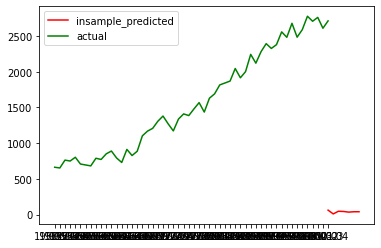

54


In [ ]:
insample_predictions = fitted_model.predict(start=54,end=60,dynamic=False)#set dynamic #start 0 is not working
type(insample_predictions)
plt.plot(insample_predictions,color='red',label='insample_predicted')
plt.plot(train,color='green',label='actual')
plt.legend(loc='upper left')
plt.show()
print(len(train))
# There's something wrong with predict,its'giving wrong results 